In [2]:
!pip install tensorflow keras sklearn matplotlib pandas pil

  Using cached sklearn-0.0.tar.gz (1.1 kB)


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [4]:
os.getcwd()

'C:\\Users\\k2h2j3'

In [5]:
cd/Users/k2h2j3/traffic/Train

C:\Users\k2h2j3\traffic\Train


In [6]:
os.getcwd()

'C:\\Users\\k2h2j3\\traffic\\Train'

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(39209, 30, 30, 3) (39209,)
(25093, 30, 30, 3) (7842, 30, 30, 3) (25093,) (7842,)
(25093, 30, 30, 3) (6274, 30, 30, 3) (25093,) (6274,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_validation = to_categorical(y_validation, 43)

In [11]:
y_train.shape, y_test.shape, y_validation.shape

((25093, 43), (7842, 43), (6274, 43))

In [12]:
train_data=pd.read_csv('C:\\Users\\k2h2j3\\traffic\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\\k2h2j3\\traffic\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()


,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [13]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [14]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [15]:
cd/Users/k2h2j3/traffic

C:\Users\k2h2j3\traffic


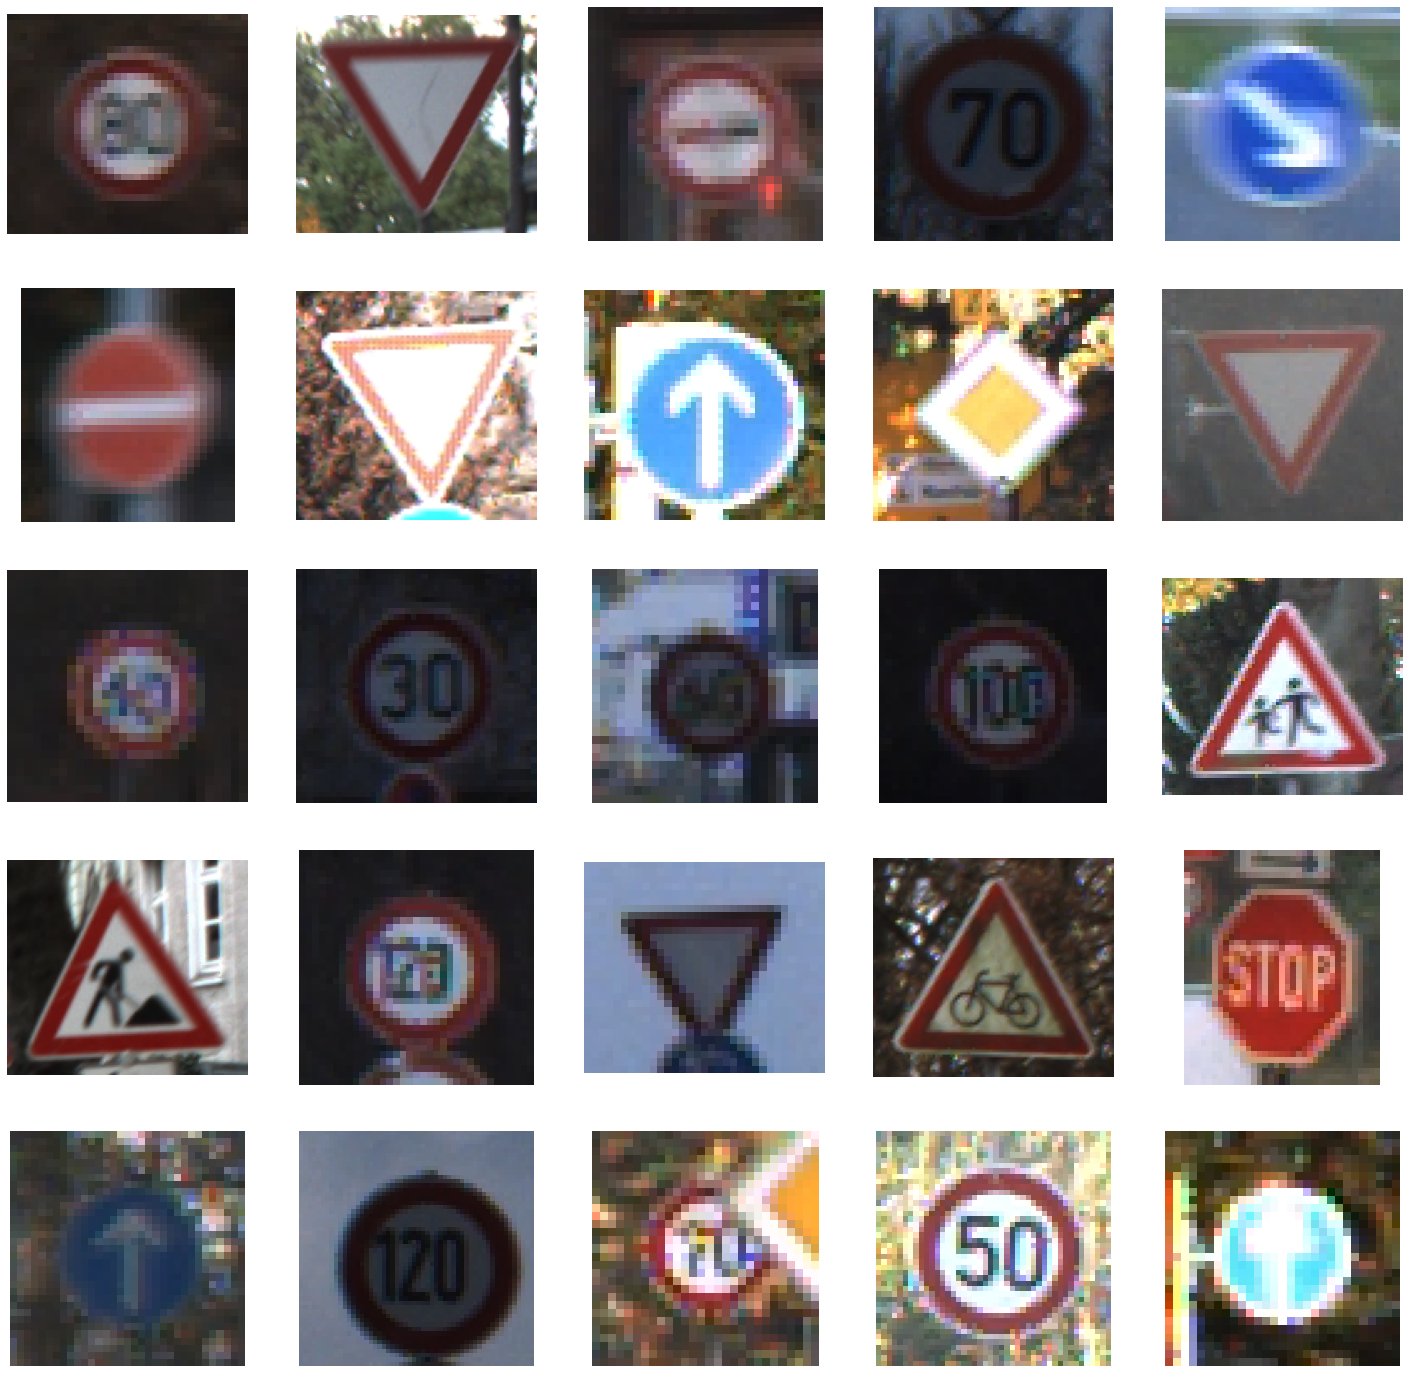

In [16]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [17]:
cd/Users/k2h2j3/traffic/Train

C:\Users\k2h2j3\traffic\Train


Text(0, 0.5, 'Number of images')

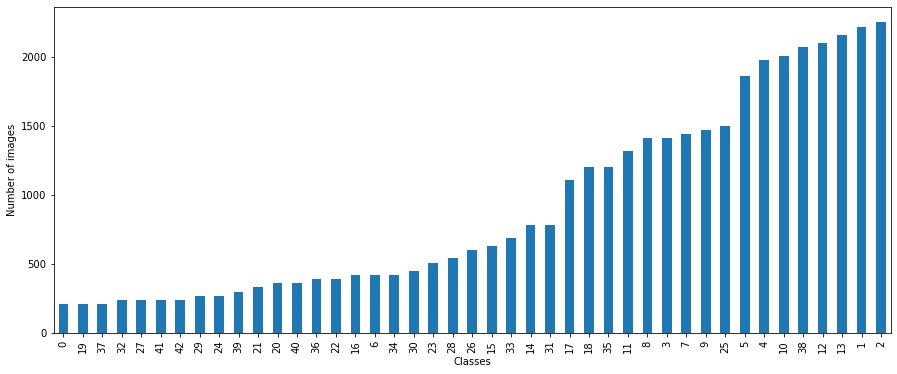

In [18]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [19]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [20]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_validation, y_validation))
model.save("my_model.h5")

Epoch 1/20
393/393 [==============================] - 29s 72ms/step - loss: 2.7877 - accuracy: 0.3257 - val_loss: 1.1808 - val_accuracy: 0.7069
Epoch 2/20
393/393 [==============================] - 33s 84ms/step - loss: 1.1826 - accuracy: 0.6507 - val_loss: 0.5338 - val_accuracy: 0.8519
Epoch 3/20
393/393 [==============================] - 32s 83ms/step - loss: 0.8089 - accuracy: 0.7506 - val_loss: 0.3713 - val_accuracy: 0.9023
Epoch 4/20
393/393 [==============================] - 31s 79ms/step - loss: 0.6685 - accuracy: 0.7950 - val_loss: 0.2931 - val_accuracy: 0.9222
Epoch 5/20
393/393 [==============================] - 31s 79ms/step - loss: 0.5525 - accuracy: 0.8317 - val_loss: 0.3580 - val_accuracy: 0.8959
Epoch 6/20
393/393 [==============================] - 31s 79ms/step - loss: 0.4895 - accuracy: 0.8508 - val_loss: 0.2077 - val_accuracy: 0.9415
Epoch 7/20
393/393 [==============================] - 31s 79ms/step - loss: 0.4705 - accuracy: 0.8565 - val_loss: 0.1891 - val_accuracy:

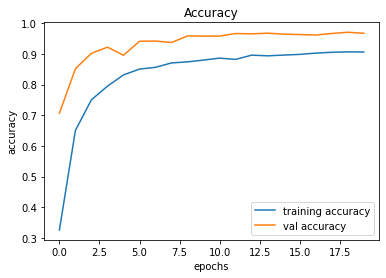

In [21]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

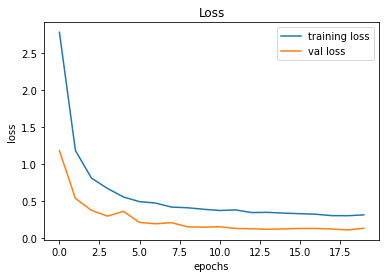

In [22]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
import numpy as np
import cv2
import pickle 
from cv2 import VideoCapture
from cv2 import waitKey

In [35]:
framewidth = 640
frameHeight = 480
brightness = 180
threshold = 0.90
font = cv2.FONT_HERSHEY_SIMPLEX

In [36]:
cap = cv2.videoCapture(0)
cap.set(3, framewidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
pickle_in=open("my_model.5","rb")
model = pickle.load(pickle_in)

def grayscale(img):
    img = cv2.cvtColor(img.cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHIst(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

def getCalssName(classNo):
    if classNo == 0: 
        return 'speed Limit 20km/h'
    elif classNo == 1: 
        return 'speed Limit 40km/h'
    elif classNo == 2: 
        return 'speed Limit 50km/h'
    elif classNo == 3: 
        return 'speed Limit 60km/h'
    elif classNo == 4: 
        return 'speed Limit 70km/h'
    elif classNo == 5: 
        return 'speed Limit 80km/h'
    elif classNo == 6: 
        return 'end of speed Limit 80km/h'
    elif classNo == 7: 
        return 'speed Limit 100km/h'
    elif classNo == 8: 
        return 'speed Limit 120km/h'
    elif classNo == 9: 
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vehicles over 3.5 metric tons'
    elif classNo == 11: 
        return 'Right-of-way at the next intersection'
    elif classNo == 12: 
        return 'prioirty road'
    elif classNo == 13: 
        return 'Yield'
    elif classNo == 14: 
        return 'Stop'
    elif classNo == 15: 
        return 'No vehicles'
    elif classNo == 16:
        return 'Veh > 3.5 tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve left'
    elif classNo == 20: 
        return 'Dangerous curve right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25: 
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27: 
        return 'Pedetrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End speed + passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'keep right'
    elif classNo == 39:
        return 'keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    else : 
        return 'End no passing veh > 3.5 tons'
        


AttributeError: module 'cv2' has no attribute 'videoCapture'

In [ ]:
while True:
    success, imgOriginal = cap.road()
    
    img = np.asarray(imgOriginal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 30, 30, 1)
    cv2.putText(imgOrignal, "CLASS:",(20, 35), font, 0.75, (0,0,255),2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY:", (20, 75), font, 0.75, (255,0,0), 2, cv2.LINE_AA)
    
    predictions = model.predict(img)
    classindex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)
    if probabilityValue > threshold:
        cv2.putText(imgOrignal,str(classIndex)+""+str(getCalssName))